In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn as skl

from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout, Flatten

from sklearn.metrics import average_precision_score, mean_squared_error, roc_curve, auc, accuracy_score, classification_report
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LogisticRegression

import xgboost as xgb

from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

base_path = "d:/work/stackoverflow/"
base_path_nn = base_path + "exp/nn/"

Using TensorFlow backend.


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/device:GPU:0']

In [3]:
def data_divider(data, per=0.8, shuffle=True):
    if shuffle:
        data = data.sample(frac=1).reset_index(drop=True)
    rr = round(len(data.index) * per)
    return data[:rr], data[rr:]

def get_norms(ser):
    return normalize(ser[:,np.newaxis], axis=0).ravel()
    #return [[i] for i in normalize(ser[:,np.newaxis], axis=0).ravel()]

In [4]:
data = pd.read_csv(base_path + 'text3.csv')
data = data

#data['lda'] = [[float(b) for b in a.strip('[]').split(', ')] for a in data['lda']]
#data['lda'] = data['lda'].tolist()

data['title_overlap'] = get_norms(data['title_overlap'])
data['ans_count'] = get_norms(data['ans_count'])
data['questions_count'] = get_norms(data['questions_count'])
data['reached_people'] = get_norms(data['reached_people'])
data['user_rating'] = get_norms(data['user_rating'])

data = data.drop(['id_post', 'id_user'], axis=1)

train_data, test_data = data_divider(data)
x_train = train_data.drop('post_type', axis=1)
y_train = train_data['post_type']
x_test = test_data.drop('post_type', axis=1)
y_test = test_data['post_type']

data[:5]

,ans_count,questions_count,reached_people,user_rating,debug_inf,title_overlap,post_type,lda0,lda1,lda2,...,lda290,lda291,lda292,lda293,lda294,lda295,lda296,lda297,lda298,lda299
0,0.000000,0.000104,4.315209e-07,2.862380e-07,0,0.000000,2,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000231,0.000753,1.877019e-04,9.961083e-05,0,0.003182,2,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.007372,0.012873,6.772750e-03,5.062119e-03,0,0.003339,2,0.0,0.0,0.0,...,0.024479,0.024474,0.0,0.0,0.024297,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000208,1.044939e-06,5.438522e-06,0,0.003162,2,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000052,4.644171e-07,2.862380e-07,0,0.000000,2,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
classifier = Sequential()

#classifier.add(Flatten(output_dim = 7, init = 'uniform', activation = 'relu', input_shape=(7, )))
classifier.add(Dense(output_dim = 200, init = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 180, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.3, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.4, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

d:\programs\python3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=306, units=200, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=180, kernel_initializer="uniform")`
  import sys
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="uniform")`
  del sys.path[0]
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call t

In [6]:
classifier.summary()

history = classifier.fit(x_train, y_train, validation_split=0.2, batch_size = 128, nb_epoch = 50)

classifier.save("model_tmp.ser")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               61400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 180)               36180     
_________________________________________________________________
dropout_2 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               18100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)               

d:\programs\python3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


MemoryError: Unable to allocate 210. MiB for an array with shape (306, 90110) and data type float64

In [7]:
def res_eval(goal, res):
    #eval_res(res, y_test, history)
    print('classification report')
    print(classification_report(goal, res))
    print('confusion matrix')
    print(skl.metrics.confusion_matrix(goal, res))
    f1_score = skl.metrics.f1_score(goal, np.argmax(res, axis=1), average="micro")
    print('F1 score: {}'.format(f1_score))
    
    fpr, tpr, thresholds = roc_curve(goal, res, pos_label=2)
    au_curve = auc(fpr, tpr)

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='area = {:.3f}'.format(au_curve))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [ ]:
prediction = classifier.predict(x_test).tolist()
plot_model(classifier, to_file="model.png")

res = np.argmax(prediction, axis=1)

res_eval(y_test, res)
        
_, train_acc = classifier.evaluate(x_train, y_train, verbose=0)
_, test_acc = classifier.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.figure(1)
#plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.figure(2)
#plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [6]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
res = model.predict(x_test)
res_eval(y_test, res)

classification report
              precision    recall  f1-score   support

           0       0.37      0.01      0.02      1746
           1       0.61      0.23      0.33      6226
           2       0.68      0.94      0.79     14556

    accuracy                           0.67     22528
   macro avg       0.55      0.39      0.38     22528
weighted avg       0.64      0.67      0.60     22528

confusion matrix
[[   14   109  1623]
 [    2  1405  4819]
 [   22   779 13755]]


NameError: name 'prediction' is not defined

classification report
              precision    recall  f1-score   support

           0       0.37      0.01      0.02      1746
           1       0.61      0.23      0.33      6226
           2       0.68      0.94      0.79     14556

    accuracy                           0.67     22528
   macro avg       0.55      0.39      0.38     22528
weighted avg       0.64      0.67      0.60     22528

confusion matrix
[[   14   109  1623]
 [    2  1405  4819]
 [   22   779 13755]]
F1 score: 0.6735617897727273


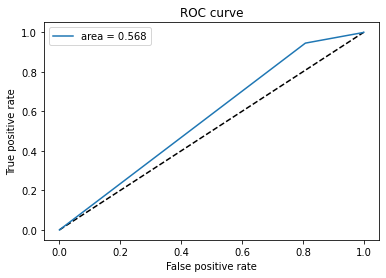

In [10]:
goal = y_test
print('classification report')
print(classification_report(goal, res))
print('confusion matrix')
print(skl.metrics.confusion_matrix(goal, res))
f1_score = skl.metrics.f1_score(goal, res, average="micro")
print('F1 score: {}'.format(f1_score))
    
fpr, tpr, thresholds = roc_curve(goal, res, pos_label=2)
au_curve = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='area = {:.3f}'.format(au_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [11]:
model.save_model('xgb_tmp.ser')